In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#Rank is based on Passing Attempts
#2018 Stats accurate as of 11/24/2018

# Reading in QB Passing and Rushing Data

In [3]:
nfl_data = {}
rush_filter = ['Player','Rushing Att','Rushing Yds','Rushing TD']
#rush_type = {'Rushing Att' : np.float64, 'Rushing Yds': np.float64,'Rushing TD': np.float64,'Rushing Lng': np.float64}

In [4]:
nfl_rr = pd.read_csv('../src/Data/nfl-2017-rr.csv')
nfl_rr[rush_filter]

,Player,Rushing Att,Rushing Yds,Rushing TD
0,Le'Veon Bell,321,1291,9
1,LeSean McCoy,287,1138,6
2,Melvin Gordon,284,1105,8
3,Todd Gurley,279,1305,13
4,Jordan Howard,276,1122,9
5,Kareem Hunt,272,1327,8
6,Leonard Fournette,268,1040,9
7,Frank Gore,261,961,3
8,C.J. Anderson,245,1007,3
9,Ezekiel Elliott,242,983,7


In [5]:
for i in range(2013,2018):
    nfl = pd.read_csv('../src/Data/nfl-{}.csv'.format(i))
    nfl_rr = pd.read_csv('../src/Data/nfl-{}-rr.csv'.format(i))
    nfl_rr = nfl_rr[rush_filter]
    nfl['Year'] = i
    nfl_full = nfl.merge(nfl_rr, on = 'Player', how = 'left')
    nfl_full.set_index(['Year', 'Player'], inplace = True)
    nfl_data[i] = nfl_full

In [6]:
nfl_data[2013].head()

Rk   Tm  Age Pos   G  GS   QBrec  Cmp  Att  Cmp%  \
Year Player                                                               
2013 Peyton Manning     1  DEN   37  QB  16  16  13-3-0  450  659  68.3   
     Matt Ryan          2  ATL   28  QB  16  16  4-12-0  439  651  67.4   
     Drew Brees         3  NOR   34  QB  16  16  11-5-0  446  650  68.6   
     Matthew Stafford   4  DET   25  QB  16  16   7-9-0  371  634  58.5   
     Tom Brady          5  NWE   36  QB  16  16  12-4-0  380  628  60.5   

                          ...      Sk  Yds2  NY/A  ANY/A  Sk%  4QC  GWD  \
Year Player               ...                                             
2013 Peyton Manning       ...      18   120  7.91   8.87  2.7  2.0  2.0   
     Matt Ryan            ...      44   298  6.07   5.72  6.3  1.0  1.0   
     Drew Brees           ...      37   244  7.16   7.51  5.4  2.0  2.0   
     Matthew Stafford     ...      23   168  6.82   6.40  3.5  2.0  3.0   
     Tom Brady            ...      40   256  6.12   6.13  6.0  5.0  5.0   

                       Rushing Att  Rushing Yds  Rushing TD  
Year Player                                                  
2013 Peyton Manning             32          -31           1  
     Matt Ryan                  17           55           0  
     Drew Brees                 35           52           3  
     Matthew Stafford           37           69           2  
     Tom Brady                  32           18           0  

[5 rows x 32 columns]

In [7]:
nfl_data[2013].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 85 entries, (2013, Peyton Manning) to (2013, Brad Smith)
Data columns (total 32 columns):
Rk             85 non-null int64
Tm             85 non-null object
Age            85 non-null int64
Pos            66 non-null object
G              85 non-null int64
GS             85 non-null int64
QBrec          51 non-null object
Cmp            85 non-null int64
Att            85 non-null int64
Cmp%           85 non-null float64
Yds            85 non-null int64
TD             85 non-null int64
TD%            85 non-null float64
Int            85 non-null int64
Int%           85 non-null float64
Lng            85 non-null int64
Y/A            85 non-null float64
AY/A           85 non-null float64
Y/C            75 non-null float64
Y/G            85 non-null float64
Rate           85 non-null float64
QBR            73 non-null float64
Sk             85 non-null int64
Yds2           85 non-null int64
NY/A           85 non-null float64
ANY/A       

In [8]:
nfl = nfl_data[2013]
for i in range(2014,2018):
    nfl = pd.concat([nfl, nfl_data[i]])

In [9]:
nfl.Pos.astype('category').cat.categories

Index(['FB/rb', 'FS', 'K', 'LCB', 'NT', 'P', 'P/WR', 'QB', 'QB/wr', 'RB', 'TE',
       'WR', 'fb/wr', 'fs', 'mlb', 'qb', 'rb', 'rb/wr', 'wr'],
      dtype='object')

# Filtering to only be Quarterbacks

In [10]:
def qb_fix(data):
    if data.Pos == 'QB/WR' or data.Pos == 'qb' or data.Pos == 'qb/wr' or data.Pos == 'QB':
        return 'QB'

In [11]:
nfl.Pos = nfl.apply(qb_fix, axis = 1)

In [12]:
qb = nfl[nfl.Pos == 'QB']

# Correcting the variable types

In [13]:
object_types = ['Rushing Att', 'Rushing Yds', 'Rushing TD']

for i in object_types:
    qb[i] = qb[i].astype('float64') 

c:\users\python\documents\python\nfl project\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [14]:
qb.head(10)

Rk   Tm  Age Pos   G  GS   QBrec  Cmp  Att  Cmp%  \
Year Player                                                                 
2013 Peyton Manning       1  DEN   37  QB  16  16  13-3-0  450  659  68.3   
     Matt Ryan            2  ATL   28  QB  16  16  4-12-0  439  651  67.4   
     Drew Brees           3  NOR   34  QB  16  16  11-5-0  446  650  68.6   
     Matthew Stafford     4  DET   25  QB  16  16   7-9-0  371  634  58.5   
     Tom Brady            5  NWE   36  QB  16  16  12-4-0  380  628  60.5   
     Joe Flacco           6  BAL   28  QB  16  16   8-8-0  362  614  59.0   
     Ryan Tannehill       7  MIA   25  QB  16  16   8-8-0  355  588  60.4   
     Andy Dalton          8  CIN   26  QB  16  16  11-5-0  363  586  61.9   
     Ben Roethlisberger   9  PIT   31  QB  16  16   8-8-0  375  584  64.2   
     Carson Palmer       10  ARI   34  QB  16  16  10-6-0  362  572  63.3   

                            ...      Sk  Yds2  NY/A  ANY/A  Sk%  4QC  GWD  \
Year Player                 ...                                             
2013 Peyton Manning         ...      18   120  7.91   8.87  2.7  2.0  2.0   
     Matt Ryan              ...      44   298  6.07   5.72  6.3  1.0  1.0   
     Drew Brees             ...      37   244  7.16   7.51  5.4  2.0  2.0   
     Matthew Stafford       ...      23   168  6.82   6.40  3.5  2.0  3.0   
     Tom Brady              ...      40   256  6.12   6.13  6.0  5.0  5.0   
     Joe Flacco             ...      48   324  5.42   4.50  7.3  2.0  4.0   
     Ryan Tannehill         ...      58   399  5.44   5.00  9.0  4.0  3.0   
     Andy Dalton            ...      29   182  6.68   6.29  4.7  0.0  3.0   
     Ben Roethlisberger     ...      42   282  6.36   6.24  6.7  1.0  3.0   
     Carson Palmer          ...      41   289  6.50   5.67  6.7  3.0  4.0   

                         Rushing Att  Rushing Yds  Rushing TD  
Year Player                                                    
2013 Peyton Manning             32.0        -31.0         1.0  
     Matt Ryan                  17.0         55.0         0.0  
     Drew Brees                 35.0         52.0         3.0  
     Matthew Stafford           37.0         69.0         2.0  
     Tom Brady                  32.0         18.0         0.0  
     Joe Flacco                 27.0        131.0         1.0  
     Ryan Tannehill             40.0        238.0         1.0  
     Andy Dalton                61.0        183.0         2.0  
     Ben Roethlisberger         27.0         99.0         1.0  
     Carson Palmer              27.0          3.0         0.0  

[10 rows x 32 columns]

In [15]:
qb.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 258 entries, (2013, Peyton Manning) to (2017, Scott Tolzien)
Data columns (total 32 columns):
Rk             258 non-null int64
Tm             258 non-null object
Age            258 non-null int64
Pos            258 non-null object
G              258 non-null int64
GS             258 non-null int64
QBrec          258 non-null object
Cmp            258 non-null int64
Att            258 non-null int64
Cmp%           258 non-null float64
Yds            258 non-null int64
TD             258 non-null int64
TD%            258 non-null float64
Int            258 non-null int64
Int%           258 non-null float64
Lng            258 non-null int64
Y/A            258 non-null float64
AY/A           258 non-null float64
Y/C            258 non-null float64
Y/G            258 non-null float64
Rate           258 non-null float64
QBR            257 non-null float64
Sk             258 non-null int64
Yds2           258 non-null int64
NY/A           258 

In [24]:
qb.fillna(0, inplace = True)

In [29]:
qb_ready = qb.drop(['Rk', 'Tm', 'Pos', 'QBrec'], axis = 1)

In [30]:
qb_ready.head(10)

Age   G  GS  Cmp  Att  Cmp%   Yds  TD  TD%  Int  \
Year Player                                                                
2013 Peyton Manning       37  16  16  450  659  68.3  5477  55  8.3   10   
     Matt Ryan            28  16  16  439  651  67.4  4515  26  4.0   17   
     Drew Brees           34  16  16  446  650  68.6  5162  39  6.0   12   
     Matthew Stafford     25  16  16  371  634  58.5  4650  29  4.6   19   
     Tom Brady            36  16  16  380  628  60.5  4343  25  4.0   11   
     Joe Flacco           28  16  16  362  614  59.0  3912  19  3.1   22   
     Ryan Tannehill       25  16  16  355  588  60.4  3913  24  4.1   17   
     Andy Dalton          26  16  16  363  586  61.9  4293  33  5.6   20   
     Ben Roethlisberger   31  16  16  375  584  64.2  4261  28  4.8   14   
     Carson Palmer        34  16  16  362  572  63.3  4274  24  4.2   22   

                            ...      Sk  Yds2  NY/A  ANY/A  Sk%  4QC  GWD  \
Year Player                 ...                                             
2013 Peyton Manning         ...      18   120  7.91   8.87  2.7  2.0  2.0   
     Matt Ryan              ...      44   298  6.07   5.72  6.3  1.0  1.0   
     Drew Brees             ...      37   244  7.16   7.51  5.4  2.0  2.0   
     Matthew Stafford       ...      23   168  6.82   6.40  3.5  2.0  3.0   
     Tom Brady              ...      40   256  6.12   6.13  6.0  5.0  5.0   
     Joe Flacco             ...      48   324  5.42   4.50  7.3  2.0  4.0   
     Ryan Tannehill         ...      58   399  5.44   5.00  9.0  4.0  3.0   
     Andy Dalton            ...      29   182  6.68   6.29  4.7  0.0  3.0   
     Ben Roethlisberger     ...      42   282  6.36   6.24  6.7  1.0  3.0   
     Carson Palmer          ...      41   289  6.50   5.67  6.7  3.0  4.0   

                         Rushing Att  Rushing Yds  Rushing TD  
Year Player                                                    
2013 Peyton Manning             32.0        -31.0         1.0  
     Matt Ryan                  17.0         55.0         0.0  
     Drew Brees                 35.0         52.0         3.0  
     Matthew Stafford           37.0         69.0         2.0  
     Tom Brady                  32.0         18.0         0.0  
     Joe Flacco                 27.0        131.0         1.0  
     Ryan Tannehill             40.0        238.0         1.0  
     Andy Dalton                61.0        183.0         2.0  
     Ben Roethlisberger         27.0         99.0         1.0  
     Carson Palmer              27.0          3.0         0.0  

[10 rows x 28 columns]

In [31]:
qb_ready.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 258 entries, (2013, Peyton Manning) to (2017, Scott Tolzien)
Data columns (total 28 columns):
Age            258 non-null int64
G              258 non-null int64
GS             258 non-null int64
Cmp            258 non-null int64
Att            258 non-null int64
Cmp%           258 non-null float64
Yds            258 non-null int64
TD             258 non-null int64
TD%            258 non-null float64
Int            258 non-null int64
Int%           258 non-null float64
Lng            258 non-null int64
Y/A            258 non-null float64
AY/A           258 non-null float64
Y/C            258 non-null float64
Y/G            258 non-null float64
Rate           258 non-null float64
QBR            258 non-null float64
Sk             258 non-null int64
Yds2           258 non-null int64
NY/A           258 non-null float64
ANY/A          258 non-null float64
Sk%            258 non-null float64
4QC            258 non-null float64
GWD           

# Prep data from Sci-Kit Learn Implementation

## Splitting into Training and Testing Data

In [32]:
train, test = train_test_split(qb_ready, test_size = 0.25, random_state = 123)

## Standardizing Data

In [36]:
scaler = StandardScaler()
scaler.fit(train)

train_stan = scaler.transform(train) 
test_stan = scaler.transform(test)

c:\users\python\documents\python\nfl project\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\python\documents\python\nfl project\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
c:\users\python\documents\python\nfl project\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


## PCA

In [ ]:
pca = PCA()

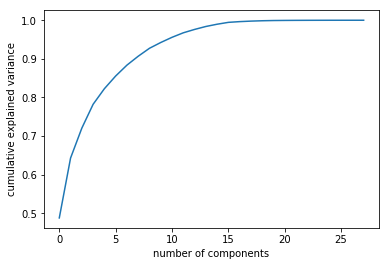

In [42]:
pca_fit = PCA().fit(train_stan)
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');